In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from prml.distributions import VariationalGaussianMixtureDistribution

In [2]:
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
x_train = np.vstack((x1, x2, x3))

x0, x1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x = np.array([x0, x1]).reshape(2, -1).T

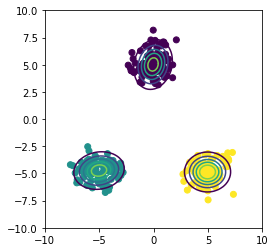

In [3]:
vgmm = VariationalGaussianMixtureDistribution(n_components=6)
vgmm.fit(x_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=vgmm.classify(x_train))
plt.contour(x0, x1, vgmm.proba(x).reshape(100, 100))
plt.xlim(-10, 10, 100)
plt.ylim(-10, 10, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [4]:
vgmm = VariationalGaussianMixtureDistribution(n_components=6)
vgmm._init_params(x_train)
params = np.hstack([param.flatten() for param in vgmm.get_params()])
fig = plt.figure()
colors = np.array(["r", "orange", "y", "g", "b", "purple"])
frames = []
for _ in range(100):
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    r = vgmm._variational_expectation(x_train)
    imgs = [plt.scatter(x_train[:, 0], x_train[:, 1], c=colors[np.argmax(r, -1)])]
    for i in range(vgmm.n_components):
        if vgmm.component_size[i] > 1:
            imgs.append(plt.scatter(vgmm.means[i, 0], vgmm.means[i, 1], 100, colors[i], "X", lw=2, edgecolors="white"))
    frames.append(imgs)
    vgmm._variational_maximization(x_train, r)
    new_params = np.hstack([param.flatten() for param in vgmm.get_params()])
    if np.allclose(new_params, params):
        break
    else:
        params = np.copy(new_params)
plt.close()
plt.rcParams['animation.html'] = 'html5'
anim = animation.ArtistAnimation(fig, frames)
anim